In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import math
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Programming practice! 

You can't take the log of 0... why?  In our example we want to gracefully handle this mistake.  How can we prevent this error and make `log(0) = 0`.

Decision trees don't really run into this case, but the example we'll do by hand does.

Write a function that returns `0` if the input is `0` or less and otherwise returns $log_2$ of the input.

In [10]:
def log2(x):
    if x == 0:
        return 0
    else:
        return math.log2(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
def log2(x):
    try:
        return math.log2(x)
    except:
        return 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
log(10)

2.302585092994046

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
log(0)

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Our data:

In [19]:
# This is just to display our table
pd.DataFrame(
    [
        ("Banana", 400, 350, 450, 500),
        ("Orange", 0, 150, 300, 300),
        ("Other", 100, 150, 50, 200),
        ("Total", 500, 650, 800, 1000),
    ],
    columns=["Label", "Long", "Sweet", "Yellow", "Total"],
)

,Label,Long,Sweet,Yellow,Total
0,Banana,400,350,450,500
1,Orange,0,150,300,300
2,Other,100,150,50,200
3,Total,500,650,800,1000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculate the entropy for `long`.  Formula for entropy:

$$E = \sum_{i=1}^{n}-p_i*log_2(p_i)$$

* $i$ = iteration or index
* $n$ = total number of classes
* $p_i$ = probability of class $i$
* $\sum$ = sum

In [22]:
# What percentage of the 'long' items belong to each class
banana = 400 / 500
orange = 0 / 500
other = 100 / 500
probs = [banana, orange, other]
long_entropy = 0
for prob in probs:
    long_entropy += -prob * log2(prob)


long_entropy

0.7219280948873623

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Entropy calc for 'short' (aka not long)
banana = 100 / 500
orange = 300 / 500
other = 100 / 500

short_entropy = 0
probs = [banana, orange, other]
for prob in probs:
    short_entropy += -prob * log2(prob)
short_entropy

1.3709505944546687

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Now we take a weighted average to get to the overall entropy
proportion_of_long = 500 / 1000
proportion_of_short = 500 / 1000

avg_entropy = proportion_of_long * long_entropy + proportion_of_short * short_entropy
avg_entropy

1.0464393446710156

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Write a function to calculate entropy given a `list` of probs (or a `np.array`, your choice)

----

## `sklearn` approach

### Data overview:

* Columns
   * BI-RADS assessment: 1 to 5 (ordinal)  
   * Age: patient's age in years (integer)
   * Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   * Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   * Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   * Severity: benign=0 or malignant=1 (binominal)


> Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead.
>
> This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006.
> 
> Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists.

In [26]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"
df = pd.read_csv(
    data_url,
    header=None,
    names=["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity",],
)
df.head(1)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Do the columns have the datatype we want?  What's the issue?

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI-RADS   961 non-null    object
 1   Age       961 non-null    object
 2   Shape     961 non-null    object
 3   Margin    961 non-null    object
 4   Density   961 non-null    object
 5   Severity  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# View rows in age that aren't numbers
df[~df["Age"].str.isnumeric()]

,BI-RADS,Age,Shape,Margin,Density,Severity
443,4,?,4,5,3,1
453,5,?,4,4,3,1
683,5,?,3,3,3,1
884,5,?,4,4,3,1
923,5,?,4,3,3,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Convert the data to numeric

In [31]:
# Convert the full dataframe to numerice and replace ? with NaN
df = df.apply(pd.to_numeric, errors="coerce", axis="columns")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Confirm that the datatypes are what we want

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    float64
dtypes: float64(6)
memory usage: 45.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* We have NaNs now, how do we want to handle them?

In [33]:
df = df.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* For this task, we want to predict `'Severity'` using all other columns except `'BI-RADS'`
* Separate the data into `X` and `y`
* `train_test_split()`

In [34]:
X = df.drop(columns=["Severity", "BI-RADS"])
y = df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Fit a `DecisionTreeClassifier()`.  How well is it performing?
* What hyperparameters could you adjust to affect model performance?

In [57]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
model.score(X_train, y_train)

0.8072289156626506

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
model.score(X_test, y_test)

0.7710843373493976

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
model.get_depth()

20

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The model has a `.predict_proba()` method.  How is it calculating probability?

In [62]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.90869565, 0.09130435],
       [0.90869565, 0.09130435],
       [0.31004367, 0.68995633],
       [0.90869565, 0.09130435],
       [0.90869565, 0.09130435],
       [0.088     , 0.912     ],
       [0.31004367, 0.68995633],
       [0.90869565, 0.09130435],
       [0.90869565, 0.09130435],
       [0.31004367, 0.68995633],
       [0.31004367, 0.68995633],
       [0.088     , 0.912     ],
       [0.31004367, 0.68995633],
       [0.4       , 0.6       ],
       [0.088     , 0.912     ],
       [0.90869565, 0.09130435],
       [0.31004367, 0.68995633],
       [0.875     , 0.125     ],
       [0.90869565, 0.09130435],
       [0.31004367, 0.68995633],
       [0.31004367, 0.68995633],
       [0.088     , 0.912     ],
       [0.31004367, 0.68995633],
       [0.90869565, 0.09130435],
       [0.31004367, 0.68995633],
       [0.31004367, 0.68995633],
       [0.90869565, 0.09130435],
       [0.33333333, 0.66666667],
       [0.46666667, 0.53333333],
       [0.088     , 0.912     ],
       [0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Plot the decision tree

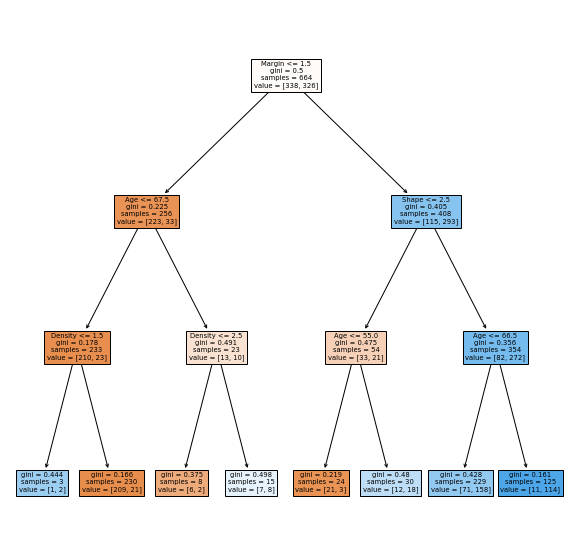

Wall time: 389 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()